In [1]:
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('melb_data.csv')
data['Date']=pd.to_datetime(data['Date'], dayfirst=True)
Melbourne_df=data.copy()

In [5]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
Melbourne_df.describe()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,2017-01-28 20:25:03.622974976,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
min,1.000000,8.500000e+04,2016-01-28 00:00:00,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,2016-09-10 00:00:00,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,2017-03-04 00:00:00,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,2017-06-24 00:00:00,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,2017-09-23 00:00:00,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000
std,0.955748,6.393107e+05,NaN,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772


In [9]:
print(Melbourne_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

Text(0, 0.5, 'Number of houses')

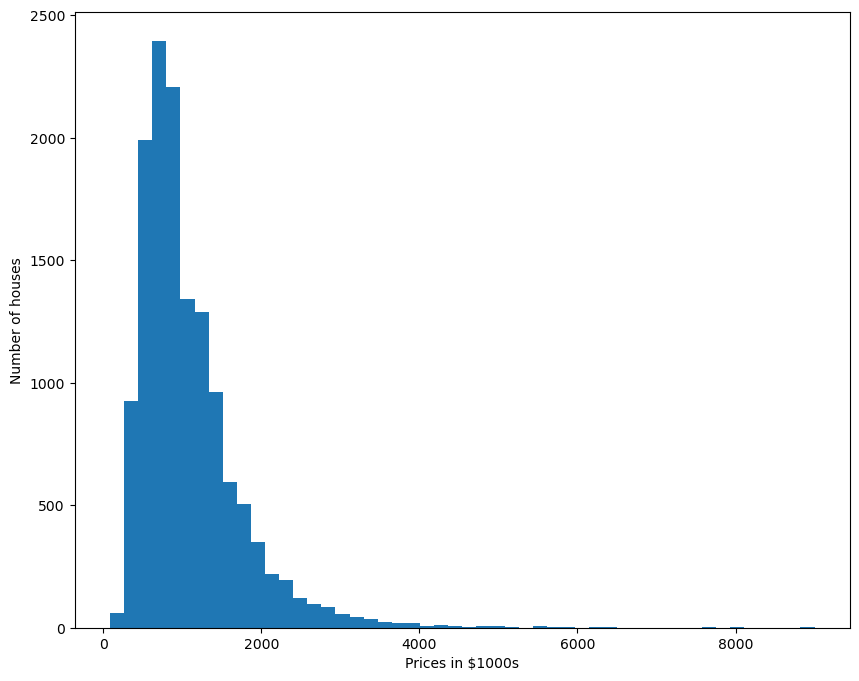

In [11]:
plt.figure(figsize=(10,8))
plt.hist(Melbourne_df.Price/1000,bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

In [13]:
Re_Name={'h':'House','u':'Unit','t':'Townhouse'}
Melbourne_df.replace({'Type':Re_Name},inplace=True)

In [15]:
Missing_Data=Melbourne_df.isnull().sum()
Missing_df=DataFrame(Missing_Data.sort_values(ascending=False))
Missing_df.columns=['Total Missing Data']
Missing_df=Missing_df.head(5)
print(Missing_df)

              Total Missing Data
BuildingArea                6450
YearBuilt                   5375
CouncilArea                 1369
Car                           62
Suburb                         0


<Axes: title={'center': 'Missing Data'}, ylabel='Total Missing Data'>

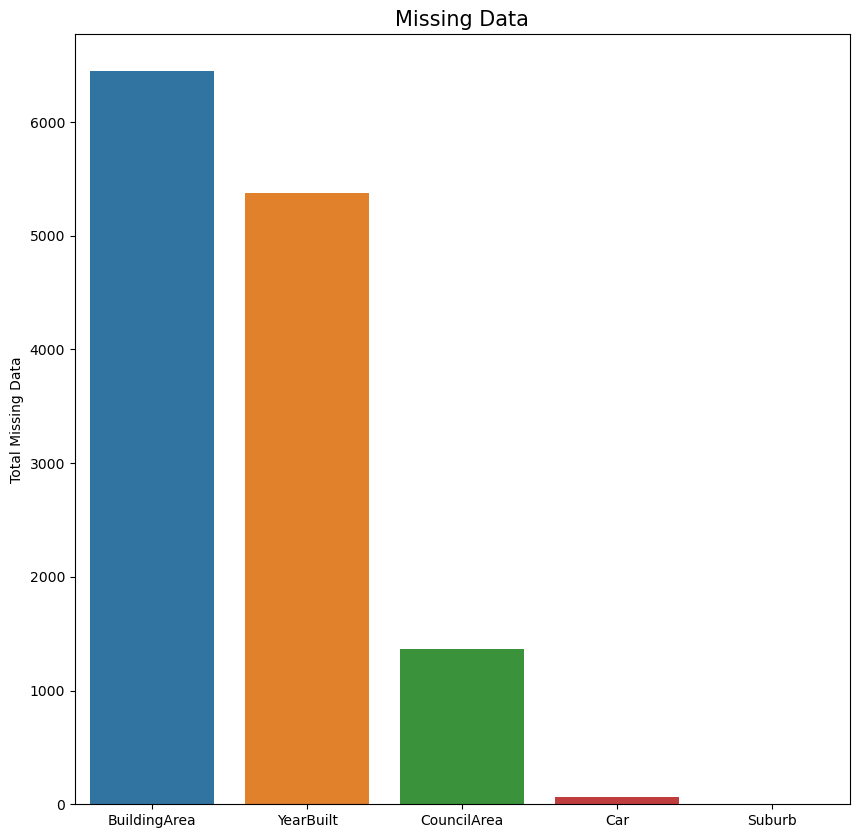

In [17]:
plt.figure(figsize=(10,10))
plt.title('Missing Data',fontsize=15)
sns.barplot(x=Missing_df.index,y='Total Missing Data',data=Missing_df)

In [19]:
Melbourne_df=Melbourne_df.drop(['BuildingArea','YearBuilt'], axis='columns')
Melbourne_df=Melbourne_df.dropna()
print(Melbourne_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12211 entries, 0 to 12212
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         12211 non-null  object        
 1   Address        12211 non-null  object        
 2   Rooms          12211 non-null  int64         
 3   Type           12211 non-null  object        
 4   Price          12211 non-null  float64       
 5   Method         12211 non-null  object        
 6   SellerG        12211 non-null  object        
 7   Date           12211 non-null  datetime64[ns]
 8   Distance       12211 non-null  float64       
 9   Postcode       12211 non-null  float64       
 10  Bedroom2       12211 non-null  float64       
 11  Bathroom       12211 non-null  float64       
 12  Car            12211 non-null  float64       
 13  Landsize       12211 non-null  float64       
 14  CouncilArea    12211 non-null  object        
 15  Lattitude      12211 non

In [21]:
Numerical_Attributes=[Attribute for Attribute in Melbourne_df.columns if Melbourne_df[Attribute].dtype !='object']
print('There are {} numerical features.'.format(len(Numerical_Attributes)))

There are 12 numerical features.


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

def preprocess_data(df):
    """
    Preprocess the Melbourne housing dataset with proper handling of categorical, numerical, and datetime features
    """
    # Create a copy of the dataframe
    df_processed = df.copy()
    
    # Identify different types of columns
    datetime_features = df_processed.select_dtypes(include=['datetime64']).columns
    numeric_features = df_processed.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = df_processed.select_dtypes(include=['object']).columns
    
    print("Data types in dataset:")
    print(df_processed.dtypes.value_counts())
    
    # Handle datetime features
    for column in datetime_features:
        # Convert datetime to numerical (days since a reference date)
        df_processed[f'{column}_days'] = (df_processed[column] - df_processed[column].min()).dt.days
        df_processed = df_processed.drop(columns=[column])
    
    # Handle missing values in numeric columns
    for column in numeric_features:
        df_processed[column] = pd.to_numeric(df_processed[column], errors='coerce')
        df_processed[column].fillna(df_processed[column].median(), inplace=True)
    
    # Handle missing values and encode categorical columns
    for column in categorical_features:
        df_processed[column].fillna('Unknown', inplace=True)
        
    # Create new features
    if 'YearBuilt' in df_processed.columns:
        df_processed['HouseAge'] = datetime.now().year - df_processed['YearBuilt']
    
    if all(col in df_processed.columns for col in ['Rooms', 'Bathroom']):
        df_processed['TotalRooms'] = df_processed['Rooms'] + df_processed['Bathroom']
    
    # Print information about categorical columns
    print("\nCategorical columns being processed:", list(categorical_features))
    
    # Create OneHotEncoder for categorical features
    if len(categorical_features) > 0:
        onehot = OneHotEncoder(sparse=False, handle_unknown='ignore')
        
        # Transform categorical features
        categorical_data = onehot.fit_transform(df_processed[categorical_features])
        categorical_feature_names = onehot.get_feature_names_out(categorical_features)
        
        # Create DataFrame with encoded categorical features
        categorical_df = pd.DataFrame(
            categorical_data,
            columns=categorical_feature_names,
            index=df_processed.index
        )
        
        # Drop original categorical columns and join encoded ones
        df_processed = df_processed.drop(columns=categorical_features)
        df_processed = pd.concat([df_processed, categorical_df], axis=1)
    
    # Final check for any remaining non-numeric columns
    non_numeric_cols = df_processed.select_dtypes(exclude=['int64', 'float64']).columns
    if len(non_numeric_cols) > 0:
        print(f"\nWarning: Found non-numeric columns after processing: {list(non_numeric_cols)}")
        print("These columns will be dropped:", list(non_numeric_cols))
        df_processed = df_processed.drop(columns=non_numeric_cols)
    
    return df_processed

def prepare_data(df, target_column='Price'):
    """
    Prepare data for training with proper handling of all feature types
    """
    # First, preprocess the data
    print("Starting data preprocessing...")
    df_processed = preprocess_data(df)
    
    # Verify all columns are numeric
    non_numeric_cols = df_processed.select_dtypes(exclude=['int64', 'float64']).columns
    if len(non_numeric_cols) > 0:
        raise ValueError(f"Non-numeric columns found after preprocessing: {list(non_numeric_cols)}")
    
    # Separate features and target
    X = df_processed.drop(columns=[target_column])
    y = df_processed[target_column]
    
    # Print shape information
    print(f"\nFeatures shape after preprocessing: {X.shape}")
    print(f"Sample features: {list(X.columns)[:5]}")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            cost = (1/(2*n_samples)) * np.sum((y_predicted - y)**2)
            self.cost_history.append(cost)
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

def evaluate_model(y_true, y_pred):
    """
    Calculate regression metrics
    """
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

In [ ]:
# Load your Melbourne housing dataset
# Assuming Melbourne_df is your dataframe

# Prepare data for training
X_train, X_test, y_train, y_test = prepare_data(Melbourne_df, target_column='Price')

# Create and train the model
model = LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
metrics = evaluate_model(y_test, y_pred)
print("\nModel Performance:", metrics)

Starting data preprocessing...
Data types in dataset:
float64           10
object             7
int64              1
datetime64[ns]     1
Name: count, dtype: int64

Categorical columns being processed: ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']


C:\Users\Sanika\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Features shape after preprocessing: (12211, 12658)
Sample features: ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom']
